In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Observations: With the head() , i'm able to fetch the top 5 records here and see the information.

--Input Features: Unnames:0,Date,TotalVolume,4046,4225,4770,Total Bags,Large Bags,XLarge Bags,type,year,region
--Output Features: AveragePrice

Unnamed: 0 seems to be a identifier column and needs to be removed.

In [3]:
df.shape

(18249, 14)

Observation: our dataset having 18,249 rows and 14 columns

In [4]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

Observation: checking the name of the columns present in the dataset

# checking for null values:

In [5]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Observation: There are no null values present in our dataset

# checking the data types of each column:

In [6]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

Observation: Dataset having 3 object type column which we need to encode this

# checking for skewness:

In [7]:
df.skew()

Unnamed: 0       0.108334
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

 Data is highly skewed in almost all the columns

# checking for the description of the dataset:

In [8]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


Observation: 
1. there are no any missing values
1.All the columns have count equal to 18249. 
2.Mean and median have high difference except for Average price stating that data has high skewness present. 
3.There is high variance in all the columns except for Average price and year column. Difference between min, max and interquartile ranges is uneven hence there are a no. of outliers present in the data.

# Univariate analysis:

In [9]:
df.nunique()

Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

Observation: Here, we are checking the no. of unique values present in each column

# separating the categorical and continuous columns:

In [10]:
cat=['year','region','type']
cont=[ 'Total Volume', '4046', '4225','4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

# First we go for the categoical data analyis:

conventional    9126
organic         9123
Name: type, dtype: int64

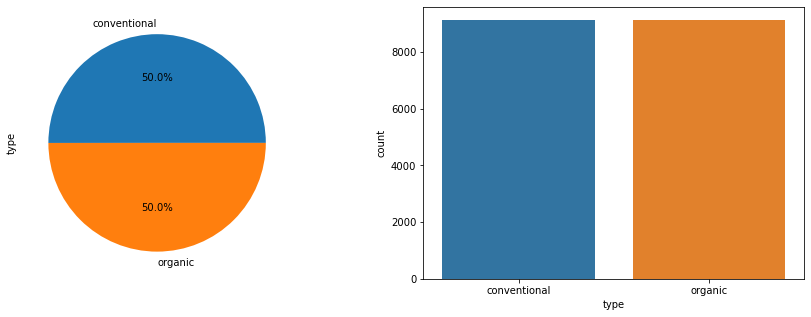

In [11]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['type'])
df['type'].value_counts()

Observation: There two types organic and conventional are almost equal and balanced.

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

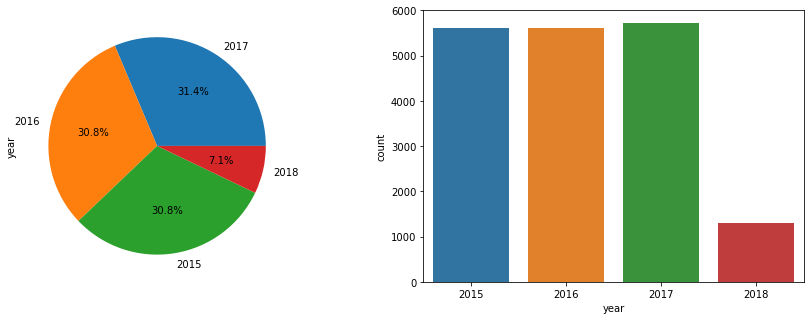

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['year'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['year'])
df['year'].value_counts()

Most of the data is from 2017 followed by 2016 and 2015 respectively, while 2018 has the least data.

Total number of regions 54


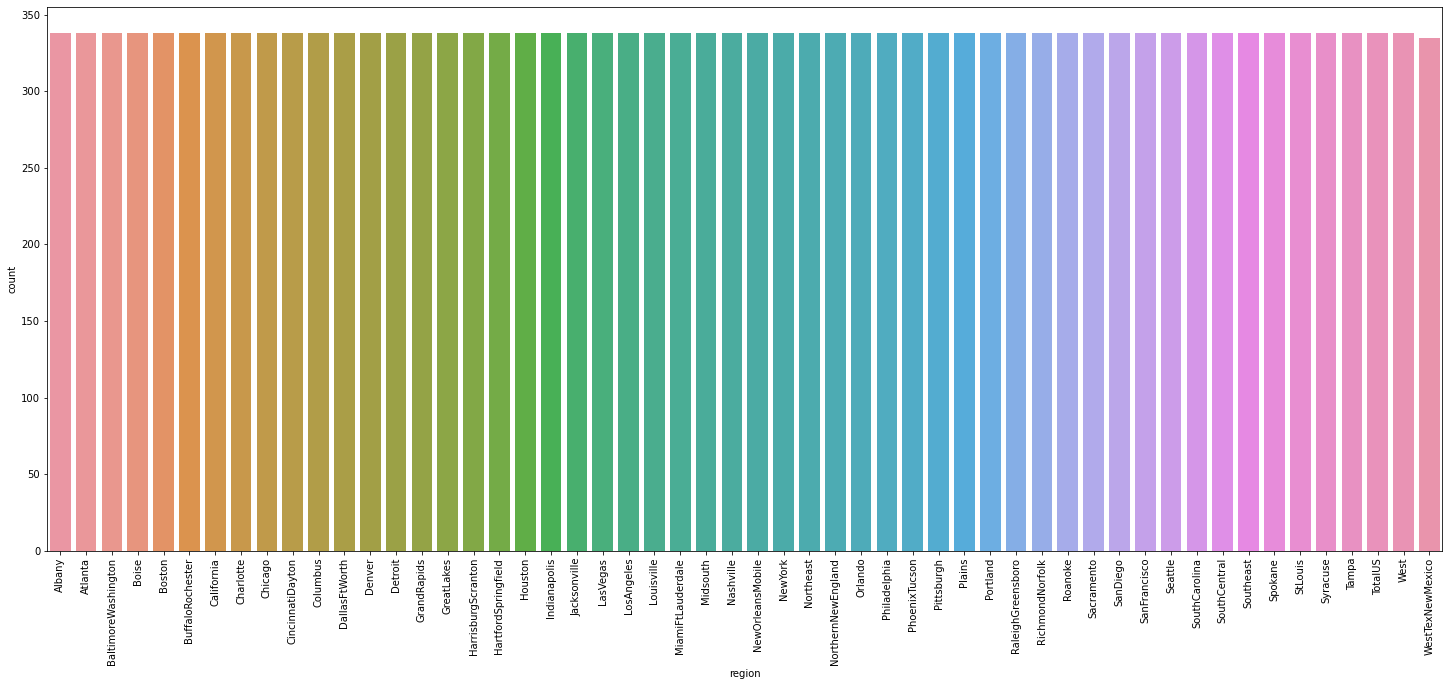

In [13]:
plt.figure(figsize=(25,10))
sns.countplot(df['region'])
plt.xticks(rotation=90)
print('Total number of regions',df['region'].nunique())

There are 54 regions in total. All the region produces almost equal amounts of avocados except for west tex new mexico which has slightly less number.

# now, visulization for continuous data:

Minimum 0.44
Maximum 3.25


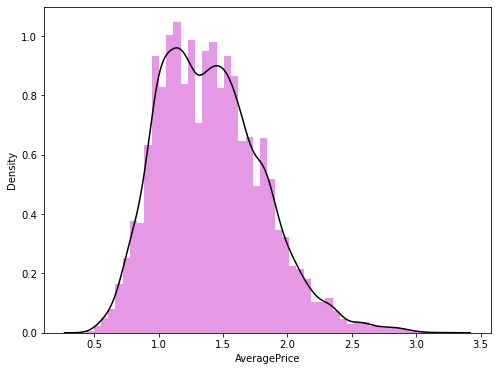

In [14]:
plt.figure(figsize=(8,6))
sns.distplot(df['AveragePrice'],color='m', kde_kws={"color": "k"})
print('Minimum',df['AveragePrice'].min())
print('Maximum',df['AveragePrice'].max())

Obseravtion: Average price of avacados little skewed, price ranging from 0.44 t0 3.25

Minimum 84.56
Maximum 62505646.52


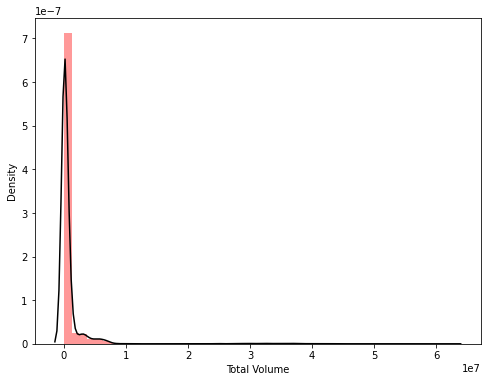

In [15]:
plt.figure(figsize=(8,6))
sns.distplot(df['Total Volume'],color='r', kde_kws={"color": "k"})
print('Minimum',df['Total Volume'].min())
print('Maximum',df['Total Volume'].max())

Most of the Total volume of Avacados is concentrated below 1e7 volumes while it goes upto 62505646.52 volumes. Data is higly skewed to the right, which needs to be taken care of ahead.

Minimum 0.0
Maximum 22743616.17


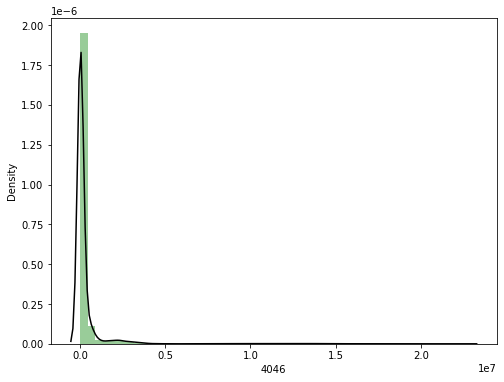

In [16]:
plt.figure(figsize=(8,6))
sns.distplot(df['4046'],color='g', kde_kws={"color": "k"})
print('Minimum',df['4046'].min())
print('Maximum',df['4046'].max())

Avacados with Product look up code 4046 is mostly concentrated near the minimum whereas the range goes up to 22743616.17. Data is higly skewed to the right, which needs to be taken care of ahead.

Minimum 0.0
Maximum 2546439.11


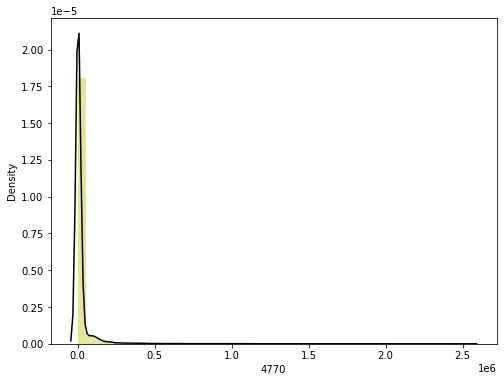

In [17]:
plt.figure(figsize=(8,6))
sns.distplot(df['4770'],color='y', kde_kws={"color": "k"})
print('Minimum',df['4770'].min())
print('Maximum',df['4770'].max())

Avacados with Product look up code 4770 is mostly concentrated near the minimum and the minimum equal to 0, whereas the range goes up to 2546439.11 as the maximum. Data is higly skewed to the right, which needs to be taken care of ahead in the data engineering process.

Minimum 0.0
Maximum 20470572.61


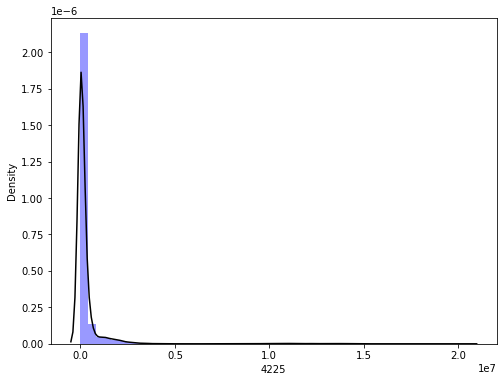

In [18]:
plt.figure(figsize=(8,6))
sns.distplot(df['4225'],color='b', kde_kws={"color": "k"})
print('Minimum',df['4225'].min())
print('Maximum',df['4225'].max())

Avacados with Product look up code 4225 is mostly concentrated near the minimum and the minimum equal to 0, whereas the range goes up to 20470572.61 as the maximum. Data is higly skewed to the right, which needs to be taken care of ahead in the data engineering process.

Minimum 0.0
Maximum 19373134.37


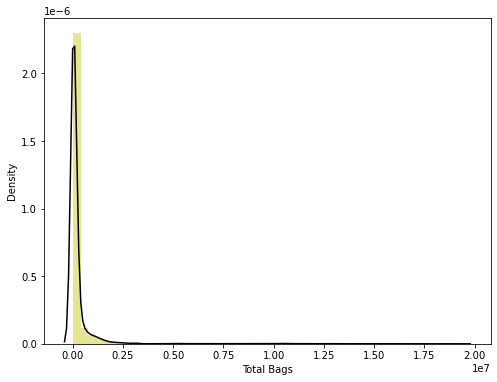

In [19]:
plt.figure(figsize=(8,6))
sns.distplot(df['Total Bags'],color='y', kde_kws={"color": "k"})
print('Minimum',df['Total Bags'].min())
print('Maximum',df['Total Bags'].max())

Total bags has most of its density near to its minimum value and goes up to a range of 19373134.37 with its maximum value. Data is clearly skewed to the right.

Minimum 0.0
Maximum 13384586.8


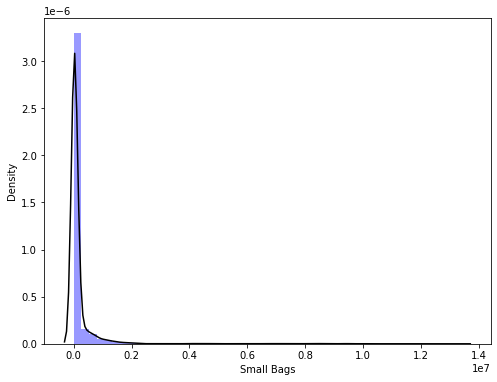

In [20]:
plt.figure(figsize=(8,6))
sns.distplot(df['Small Bags'],color='b', kde_kws={"color": "k"})
print('Minimum',df['Small Bags'].min())
print('Maximum',df['Small Bags'].max())

small bags has most of its density near to its minimum value which is 0 and goes up to a range of 13384586.8 with its maximum value. Data is clearly skewed to the right.

Minimum 0.0
Maximum 5719096.61


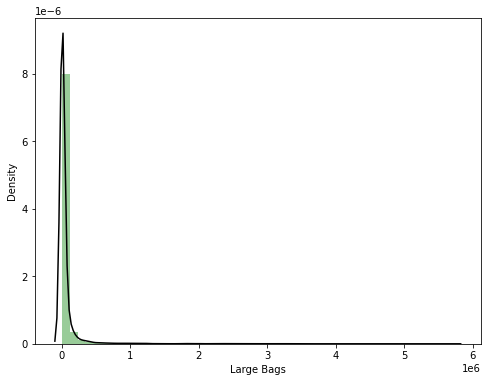

In [21]:
plt.figure(figsize=(8,6))
sns.distplot(df['Large Bags'],color='g', kde_kws={"color": "k"})
print('Minimum',df['Large Bags'].min())
print('Maximum',df['Large Bags'].max())

Large bags has most of its density near to its minimum value which is 0 and goes up to a range of 5719096.61 with its maximum value. Data is clearly skewed to the right.

Minimum 0.0
Maximum 551693.65


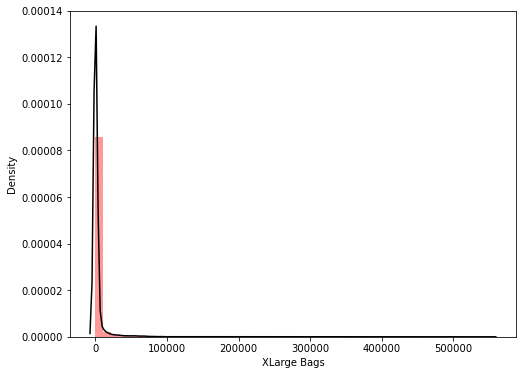

In [22]:
plt.figure(figsize=(8,6))
sns.distplot(df['XLarge Bags'],color='r', kde_kws={"color": "k"})
print('Minimum',df['XLarge Bags'].min())
print('Maximum',df['XLarge Bags'].max())

Xtra large bags are densely populated in the range 0 to 5000, whereas they are spread till values more than 5 lakh. Distribution of data is highly right skewed.

# checking for the outliers:

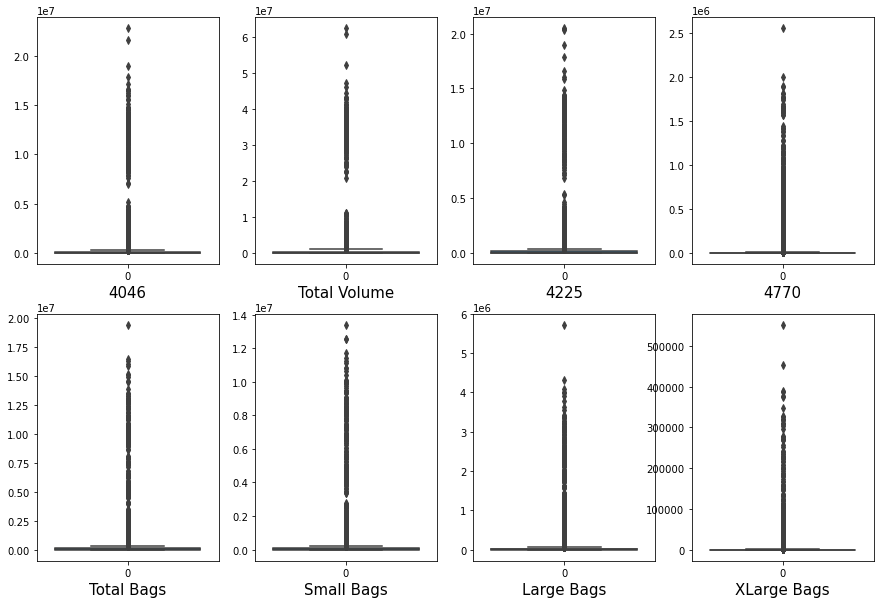

In [23]:
plt.figure(figsize=(15,10))
plotnumber=1

for column in df[['4046','Total Volume','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']]:
    if plotnumber<=8:
        plt.subplot(2,4,plotnumber)
        ax=sns.boxplot(data=df[column])
        plt.xlabel(column,fontsize=15)
        
        plotnumber+=1
plt.show()

There are a large number of outliers present in all the features that is needed to be removed

# Bivariate Analysis:

<AxesSubplot:xlabel='year', ylabel='region'>

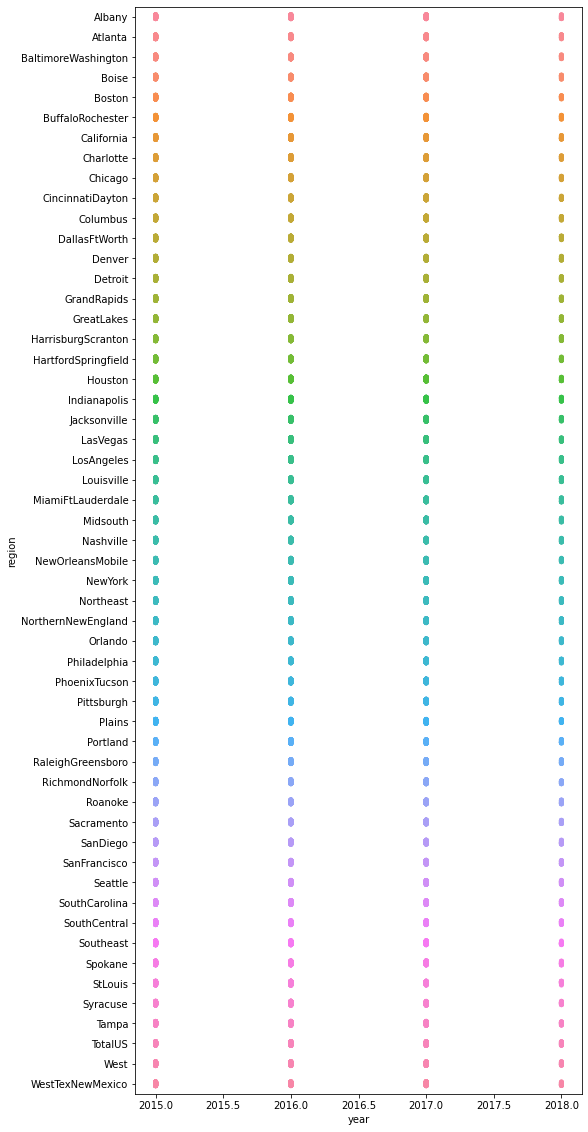

In [24]:
plt.figure(figsize=(8,20))
sns.stripplot(x='year',y='region',data=df)

Avocados are collected from all the regions irrespective of the year. For each year avocados are collected from all the same regions.

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

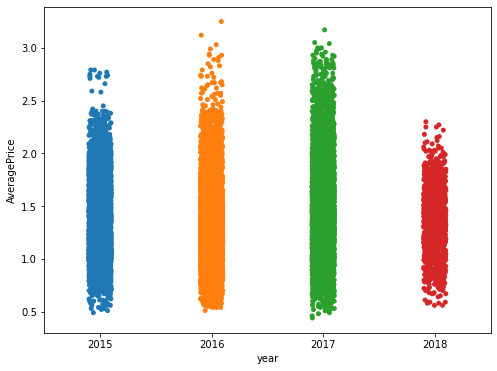

In [25]:
plt.figure(figsize=(8,6))
sns.stripplot(x='year',y='AveragePrice',data=df)

Average price is highest in the year 2016, but relatively price seem to increase as the time passes except for the year 2018 which is an exception.

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

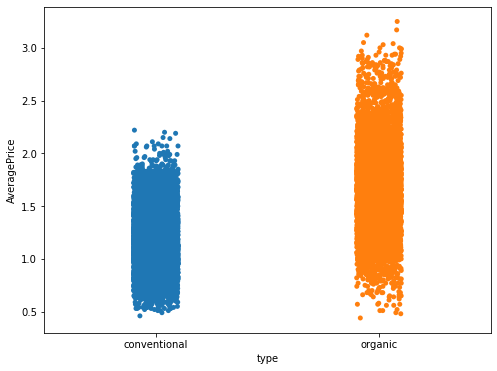

In [26]:
plt.figure(figsize=(8,6))
sns.stripplot(x='type',y='AveragePrice',data=df)

Observation: Organic Avacoados are more expensive than the conventional ones.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'Albany'),
  Text(1, 0, 'Atlanta'),
  Text(2, 0, 'BaltimoreWashington'),
  Text(3, 0, 'Boise'),
  Text(4, 0, 'Boston'),
  Text(5, 0, 'BuffaloRochester'),
  Text(6, 0, 'California'),
  Text(7, 0, 'Charlotte'),
  Text(8, 0, 'Chicago'),
  Text(9, 0, 'CincinnatiDayton'),
  Text(10, 0, 'Columbus'),
  Text(11, 0, 'DallasFtWorth'),
  Text(12, 0, 'Denver'),
  Text(13, 0, 'Detroit'),
  Text(14, 0, 'GrandRapids'),
  Text(15, 0, 'GreatLakes'),
  Text(16, 0, 'HarrisburgScranton'),
  Text(17, 0, 'HartfordSpringfield'),
  Text(18, 0, 'Houston'),
  Text(19, 0, 'Indianapolis'),
  Text(20, 0, 'Jacksonville'),
  Text(21, 0, 'LasVegas'),
  Text(22, 0, 'LosAngeles'),
  Text(23, 0, 'Louisville'),
  Text(24, 0, 'MiamiFtLauderdale'),
  Text(25, 0, 'M

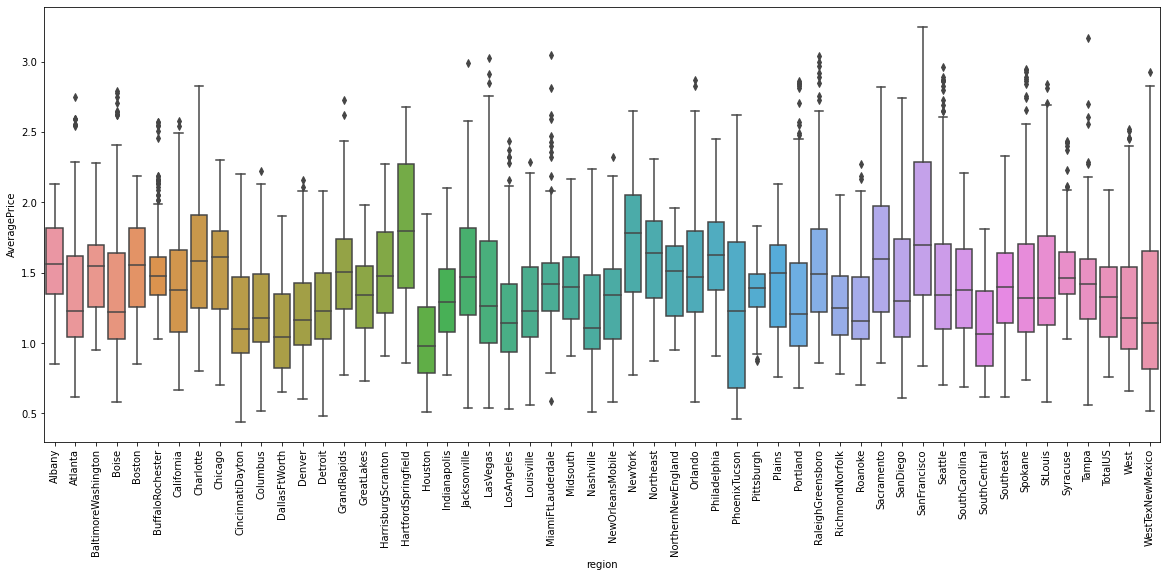

In [27]:
plt.figure(figsize=(20,8))
sns.boxplot(x='region',y='AveragePrice',data=df)
plt.xticks(rotation=90)

Observation: Highest average price for avacaodo's were in San diego, Las vegas and cahrlotte regions while the least was from phoenix tucson. It is also to be noted that highest average price belong from areas where there is more development.

# Checking for relationship between continuous feature and target variable:

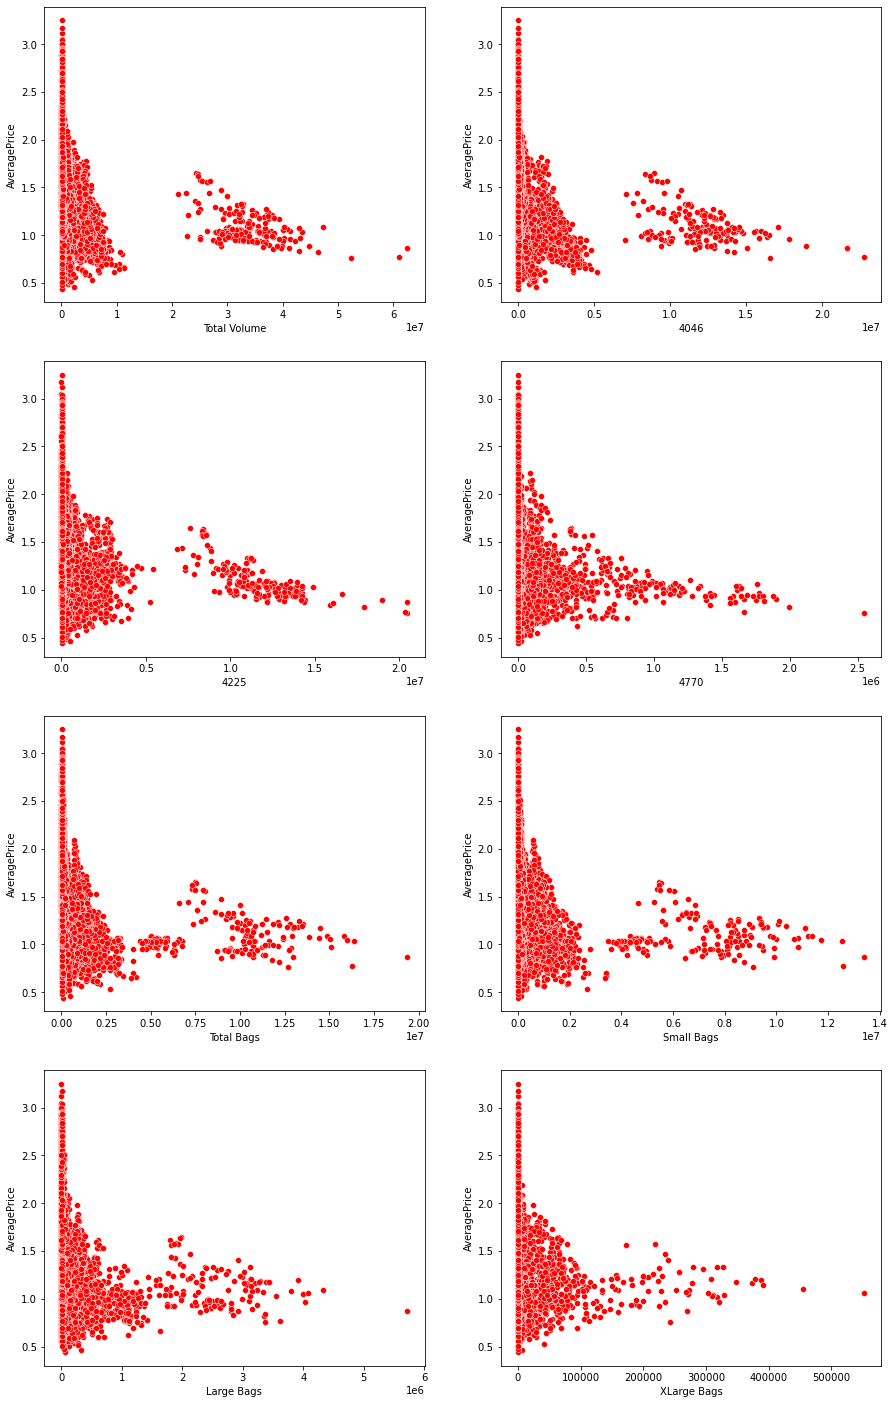

In [28]:
fig,ax=plt.subplots(4,2,figsize=(15,25))
r=0
c=0
for i,n in enumerate(cont):
    if i%2==0 and i>0:
        r+=1
        c=0
    sns.scatterplot(x=n,y='AveragePrice',data=df,ax=ax[r,c],color='r')
    c+=1

Observation:Average price shows a negative correlation as the average price seem to decrease as total volumes, PLU's and types of bags increases which means that average price decreases as the quantity of avacado's decreases.

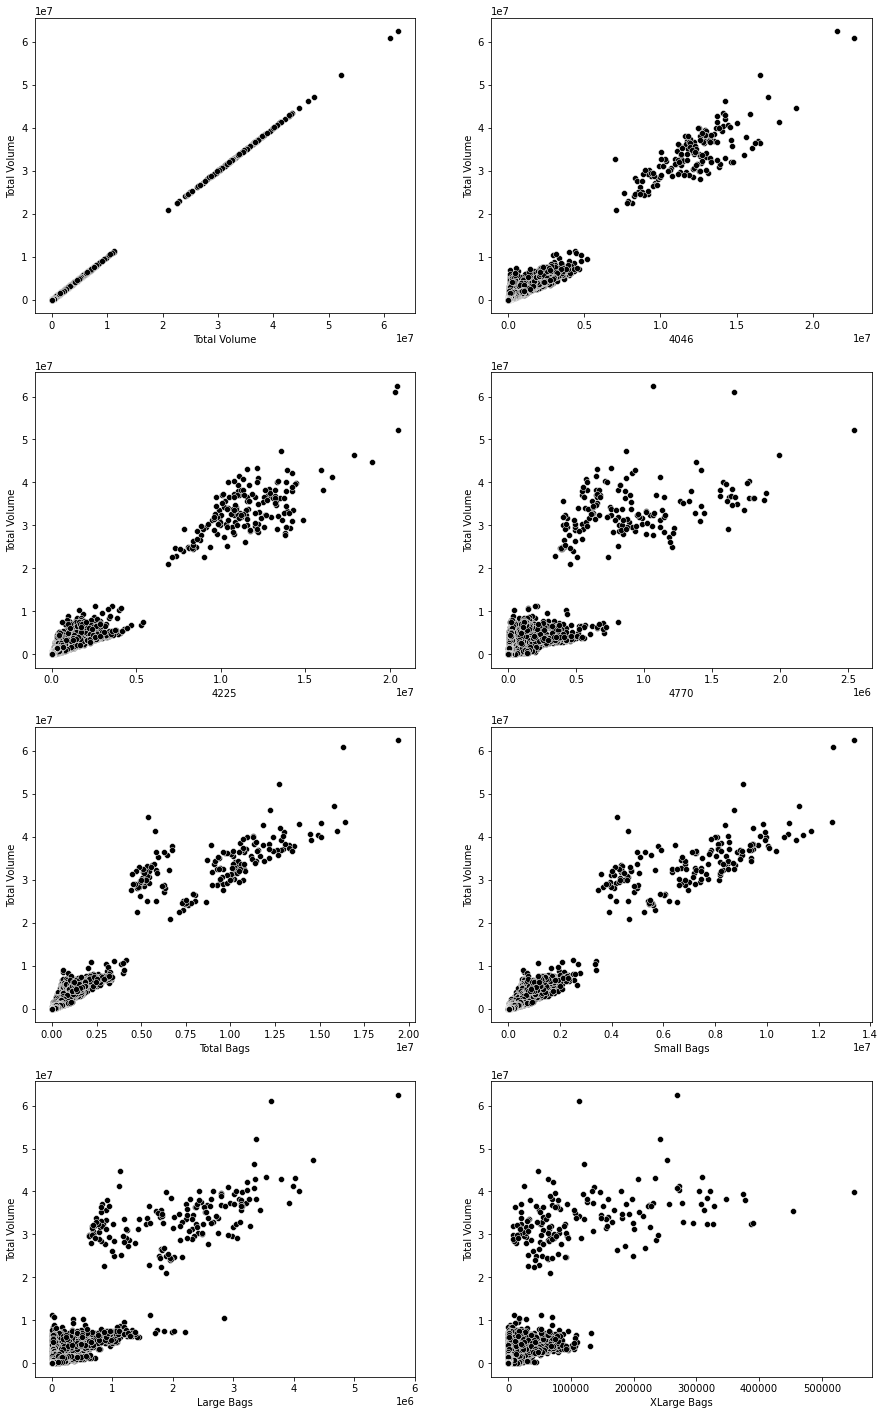

In [29]:
fig,ax=plt.subplots(4,2,figsize=(15,25))
r=0
c=0
for i,n in enumerate(cont):
    if i%2==0 and i>0:
        r+=1
        c=0
    sns.scatterplot(x=n,y='Total Volume',data=df,ax=ax[r,c],color='k')
    c+=1

Observation: With the increase in total volumes of avacado, quatity of all types of bags as well as PLU's also increases. This is logical as if volume of avacado's increases, no. of bags needed to carry it and PLU's inreases.

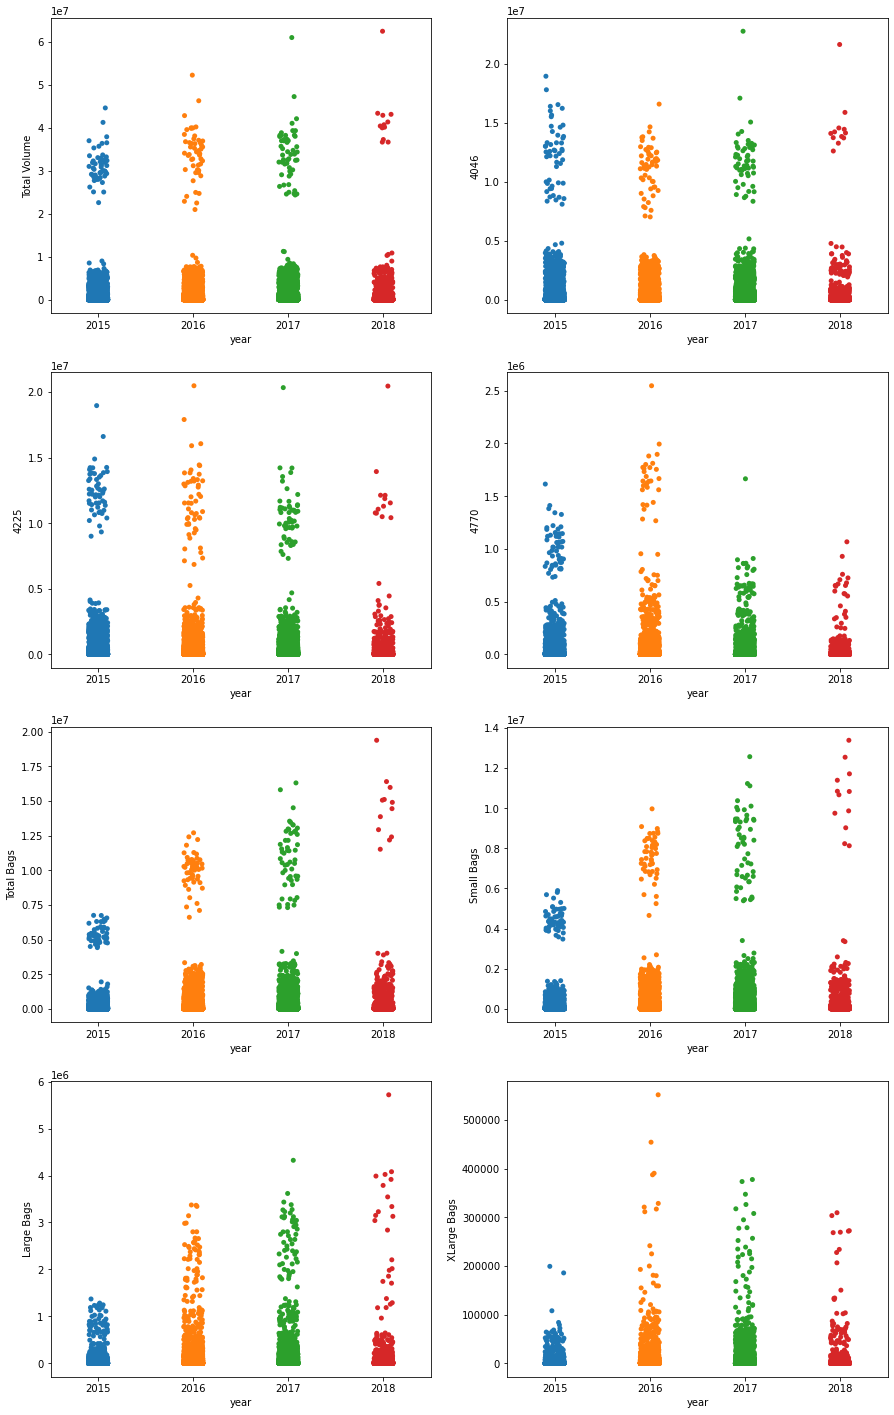

In [30]:
fig,ax=plt.subplots(4,2,figsize=(15,25))
r=0
c=0
for i,n in enumerate(cont):
    if i%2==0 and i>0:
        r+=1
        c=0
    sns.stripplot(x='year',y=n,data=df,ax=ax[r,c])
    c+=1

Observation: Though data for the year 2018 is very low but we can see that total volume, types of bags and PLUs are highest for 2018. As the time has passed volumes, bags to carry avocados and plus have increased without any doubt.

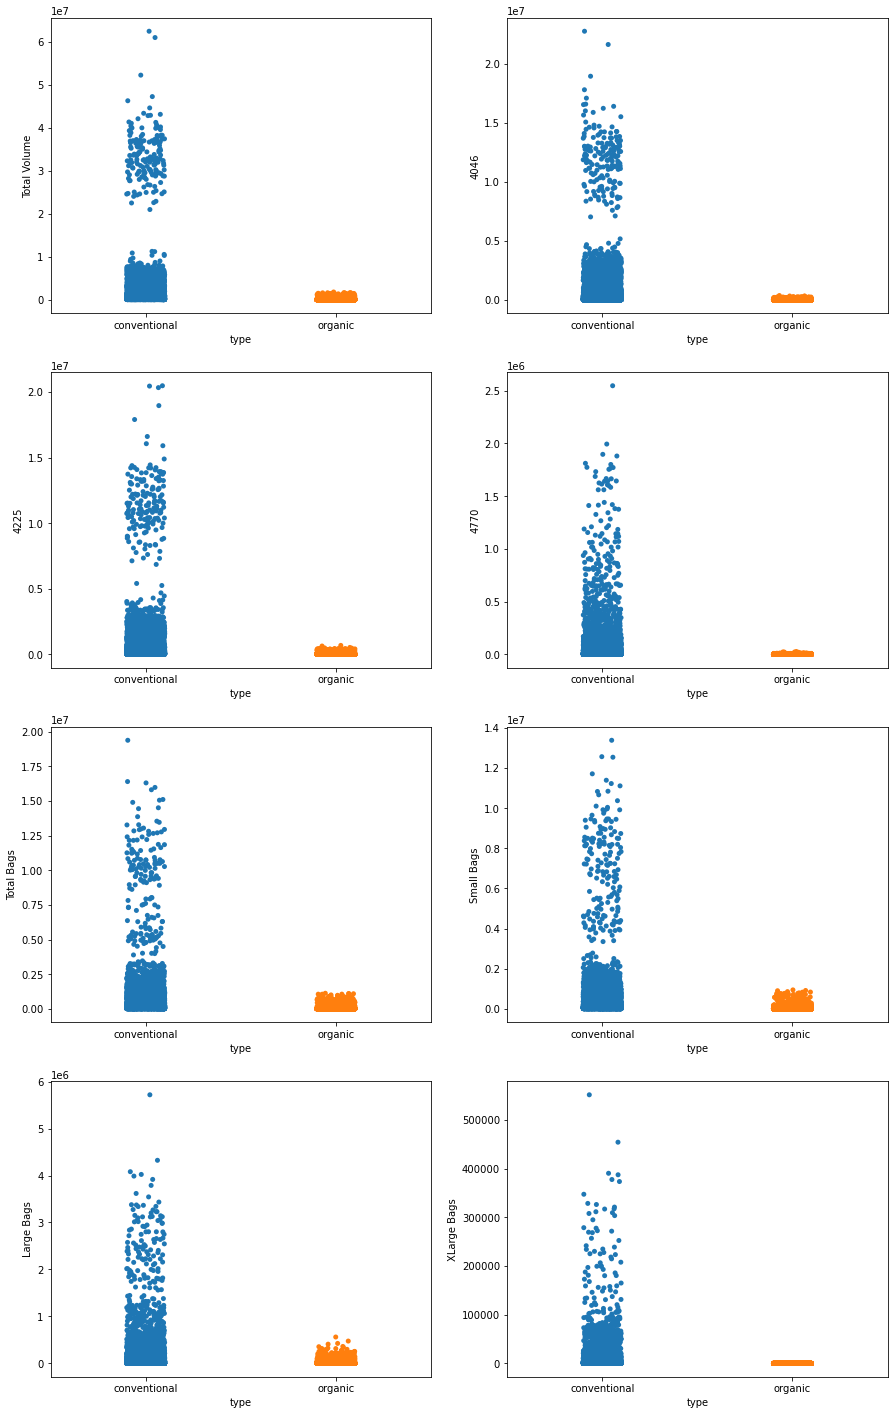

In [31]:
fig,ax=plt.subplots(4,2,figsize=(15,25))
r=0
c=0
for i,n in enumerate(cont):
    if i%2==0 and i>0:
        r+=1
        c=0
    sns.stripplot(x='type',y=n,data=df,ax=ax[r,c])
    c+=1

Observation:Toal volumes. types of bags, and PLU's are all high for convetional type of avocados, this states that although price of organic type is high but cobventional types of avocados are more produced.

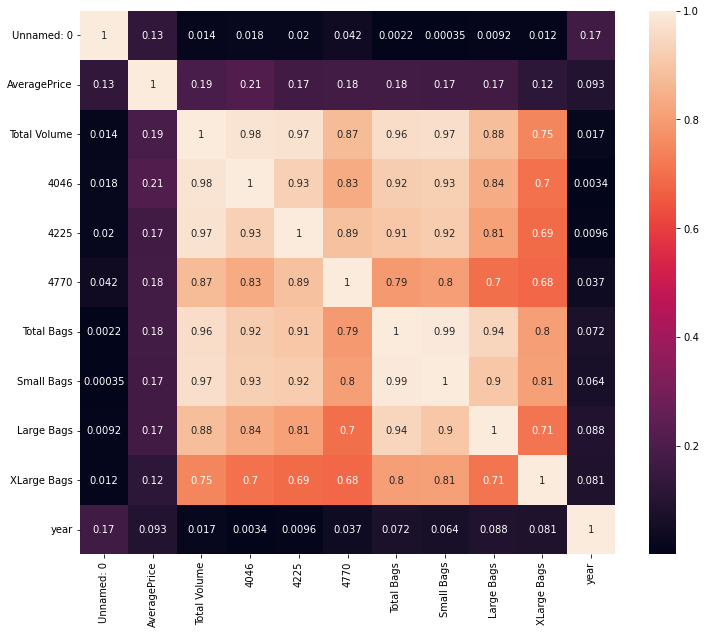

In [32]:
df_corr=df.corr().abs()

plt.figure(figsize=(12,10))
sns.heatmap(df_corr,annot=True,annot_kws={'size':10})
plt.show()

Observation: Average price shows positive relationship with the year column while negative correlation with all the other column. Intresting thing to notice here is that independent features show more than 90% correlation with each other. This is a case of multicollinearity. We need to remove some features to resolve this problem.

# removing unncessary constant columns:

In [33]:
df.drop(['Unnamed: 0','year'],axis=1,inplace=True)

# Handling date columns:

In [34]:
df[["Date", "Month", "Year"]] = df["Date"].str.split("-", expand = True)

In [35]:
df[["Date", "Month", "Year"]]=df[["Date", "Month", "Year"]].astype(int)

observation: converting objects into integer datatypes

In [36]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Month,Year
0,2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,12,27
1,2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,12,20
2,2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,12,13
3,2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,12,6
4,2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,11,29


In [37]:
df.shape

(18249, 14)

# Encoding:

In [38]:
from sklearn.preprocessing import OrdinalEncoder
o=OrdinalEncoder()

In [39]:
df['region']=o.fit_transform(df['region'].values.reshape(-1,1))
df['type']=o.fit_transform(df['type'].values.reshape(-1,1))

# removing outliers:

Z-SCORE method

In [40]:
from scipy import stats

In [41]:
from scipy.stats import zscore

In [42]:
z=np.abs(zscore(df))
print(np.where(z>3))

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64), array([3, 3, 9, ..., 1, 1, 1], dtype=int64))


In [43]:
df=df[(z<3).all(axis=1)]

In [44]:
df.shape

(17651, 14)

observation: with outliers removing we are able to reduce 598 rows with a loss of 3.27% data loss, which is good

# handling skewness:

In [45]:
x=df.drop(['AveragePrice'],axis=1)
y=df['AveragePrice']

In [46]:
x.skew()

Date            0.229976
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
region          0.012798
Month           0.107408
Year            0.011778
dtype: float64

Observation: --skewness more than +/- 0.5 will treated --we can see here there are some data skewed in column[Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags] --here we are going for the removal of skewness in tha columns whichever having skewness +/- 0.5. And here the columns [Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags]

In [47]:
from sklearn.preprocessing import power_transform

x[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']]=power_transform(x[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']],method='yeo-johnson')

In [48]:
x.skew()

Date            0.229976
Total Volume   -0.008642
4046           -0.039282
4225           -0.044675
4770            0.024168
Total Bags     -0.022204
Small Bags     -0.024405
Large Bags     -0.110913
XLarge Bags     0.853758
type           -0.037741
region          0.012798
Month           0.107408
Year            0.011778
dtype: float64

Observation: we can clearly see here, skewness is removed from every column

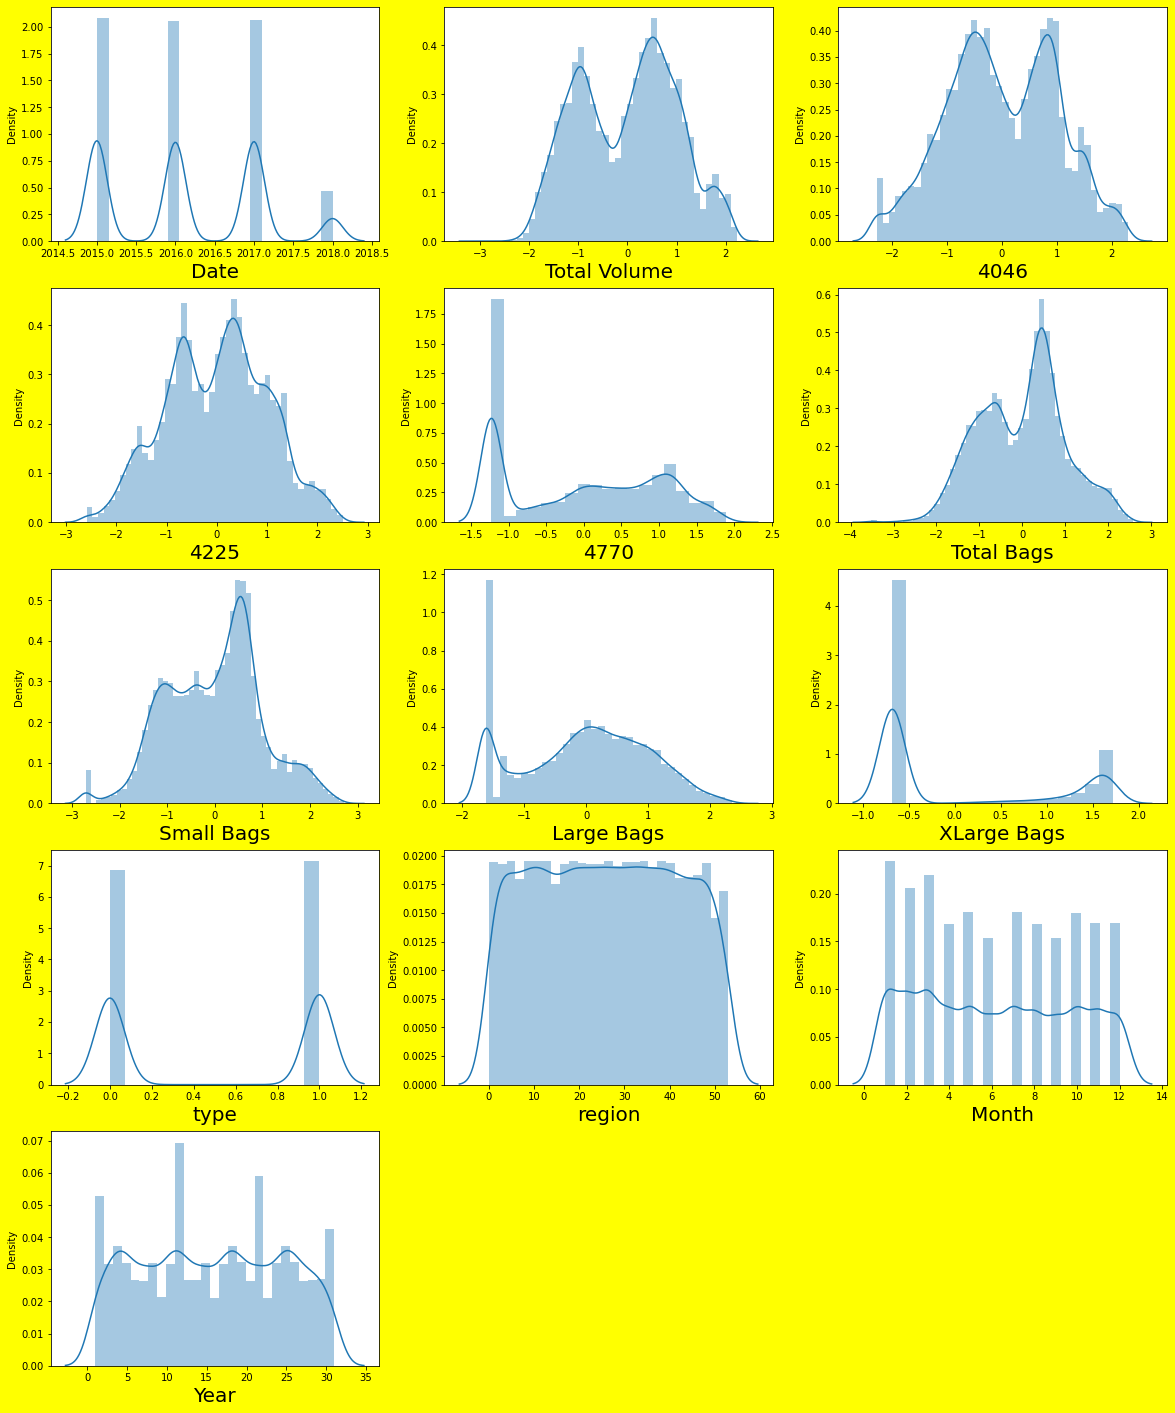

In [49]:
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber=1

for column in x:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
        plotnumber+=1
plt.show()

observation: Skewness is almost negligible after using tranformations techniques. Only XLarge bags shows skewness in graph but it is still reduced considerably.

# spliting the dependent and independent variable:

In [50]:
x=df.drop(['AveragePrice'],axis=1)
y=df['AveragePrice']

# Scaling the data:

In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [52]:
xd=scaler.fit_transform(x)
x=pd.DataFrame(xd,columns=x.columns)

# Model Building:

In [53]:
from sklearn.model_selection import train_test_split,cross_val_score

In [54]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

In [55]:
from sklearn.linear_model import LinearRegression

LR=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state {i}, The training accuracy is:-{r2_score(y_train,LR_predict_train)}')
    print(f'At random state {i}, The test accuracy is:-{r2_score(y_test,LR_predict_test)}')

At random state 0, The training accuracy is:-0.44820527160436807
At random state 0, The test accuracy is:-0.4236698402879884
At random state 1, The training accuracy is:-0.4445125894290599
At random state 1, The test accuracy is:-0.4371548598485798
At random state 2, The training accuracy is:-0.4442717598216007
At random state 2, The test accuracy is:-0.4378968735798773
At random state 3, The training accuracy is:-0.43776479984661665
At random state 3, The test accuracy is:-0.46091848585554207
At random state 4, The training accuracy is:-0.44216112074523106
At random state 4, The test accuracy is:-0.445589166247071
At random state 5, The training accuracy is:-0.4439790001481303
At random state 5, The test accuracy is:-0.43879175671369086
At random state 6, The training accuracy is:-0.435693466851076
At random state 6, The test accuracy is:-0.4678313142914585
At random state 7, The training accuracy is:-0.44030835557464343
At random state 7, The test accuracy is:-0.45180240237255365
At 

Observation: at random state 6 giving the highest accuracy. so we'll choose that as random state

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=6)

In [57]:
x_train.shape

(13767, 13)

In [58]:
y_train.shape

(13767,)

In [59]:
x_test.shape

(3884, 13)

In [60]:
y_test.shape

(3884,)

# Linear Regression:

In [61]:
LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.435693466851076


In [62]:
print('MSE:',mean_squared_error(LR_predict,y_test))
print('MAE:',mean_absolute_error(LR_predict,y_test))
print('r2_score:',r2_score(LR_predict,y_test))
cross_Val = cross_val_score(LR,x,y,cv=10)
print("Cross validation",cross_Val.mean())

MSE: 0.07949353735395243
MAE: 0.2206392697025381
r2_score: -0.21245859930163902
Cross validation -0.005382764196203771


# Ridge:

In [63]:
from sklearn.linear_model import Ridge

R=Ridge()
R.fit(x_train,y_train)
print(R.score(x_train,y_train))
R_predict=R.predict(x_test)

0.4356231280082571


In [64]:
print('MAE:',mean_absolute_error(R_predict,y_test))
print('MSE:',mean_squared_error(R_predict,y_test))
print('r2_score:',r2_score(R_predict,y_test))
cross_Val = cross_val_score(R,x,y,cv=10)
print("Cross validation",cross_Val.mean())

MAE: 0.22054856261747918
MSE: 0.0794711847497655
r2_score: -0.2146597025835404
Cross validation -0.0044513539640191335


# SVR

In [65]:
from sklearn.svm import SVR

svr=SVR(kernel='linear')
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
svr_predict=svr.predict(x_test)

0.43384809537175406


In [66]:
print('MSE:',mean_squared_error(svr_predict,y_test))
print('MAE:',mean_absolute_error(svr_predict,y_test))
print('r2_score:',r2_score(svr_predict,y_test))
cross_Val = cross_val_score(svr,x,y,cv=10)
print("Cross validation",cross_Val.mean())

MSE: 0.07956072529638708
MAE: 0.21992029781666791
r2_score: -0.22407300173354372
Cross validation -0.008201479976974856


# RandomForestRegressor:

In [67]:
from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor()
RF.fit(x_train,y_train)
print(RF.score(x_train,y_train))
RF_PRED=RF.predict(x_test)

0.9841046647385232


In [68]:
print('MSE:',mean_squared_error(RF_PRED,y_test))
print('MAE:',mean_absolute_error(RF_PRED,y_test))
print('r2_score:',r2_score(RF_PRED,y_test))
cross_Val = cross_val_score(RF,x,y,cv=10)
print("Cross validation",cross_Val.mean())

MSE: 0.01653379451081359
MAE: 0.08921364572605558
r2_score: 0.862337615225692
Cross validation 0.36343094752624006


# Decision Tree Regressor:

In [69]:
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
print(DTR.score(x_train,y_train))
DTR_PRED=DTR.predict(x_test)

1.0


In [70]:
print('MSE:',mean_squared_error(DTR_PRED,y_test))
print('MAE:',mean_absolute_error(DTR_PRED,y_test))
print('r2_score:',r2_score(DTR_PRED,y_test))
cross_Val = cross_val_score(DTR,x,y,cv=10)
print("Cross validation",cross_Val.mean())

MSE: 0.041185762100926886
MAE: 0.12992533470648815
r2_score: 0.723429632392999
Cross validation -0.15070005332825084


# GradientBoost Regressor:

In [71]:
from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
print(GBR.score(x_train,y_train))
GBR_PRED=GBR.predict(x_test)

0.7589126058181261


In [72]:
print('MSE:',mean_squared_error(GBR_PRED,y_test))
print('MAE:',mean_absolute_error(GBR_PRED,y_test))
print('r2_score:',r2_score(GBR_PRED,y_test))
cross_Val = cross_val_score(GBR,x,y,cv=10)
print("Cross validation",cross_Val.mean())

MSE: 0.037226696392591366
MAE: 0.147406345727902
r2_score: 0.60986893732437
Cross validation 0.42776181884968956


# KNearest Neighbors: 

In [73]:
from sklearn.neighbors import KNeighborsRegressor

knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
print(knn.score(x_train,y_train))
knn_PRED=knn.predict(x_test)

0.6846467271761343


In [74]:
print('MSE:',mean_squared_error(knn_PRED,y_test))
print('MAE:',mean_absolute_error(knn_PRED,y_test))
print('r2_score:',r2_score(knn_PRED,y_test))
cross_Val = cross_val_score(knn,x,y,cv=10)
print("Cross validation",cross_Val.mean())

MSE: 0.06904333779608651
MAE: 0.1943280123583934
r2_score: 0.27979546019784274
Cross validation -0.13760057421848848


Observation: 
-Accourding to all metrics score selecting the RandomForestRegressor as final model for hyper parameter tuning

# Hyper Parameter Tuning

# GridSearchCV

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
param_grid={'n_estimators':[13,15],
           'max_depth':[10,15],
           'min_samples_split':[10,11],
            'min_samples_leaf':[5,6]
           }

In [77]:
gridsearch=GridSearchCV(estimator=RF,param_grid=param_grid)

In [78]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 15], 'min_samples_leaf': [5, 6],
                         'min_samples_split': [10, 11],
                         'n_estimators': [13, 15]})

In [79]:
gridsearch.best_params_

{'max_depth': 15,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 15}

In [80]:
RF=gridsearch.best_estimator_
RF.fit(x_train,y_train)

RandomForestRegressor(max_depth=15, min_samples_leaf=5, min_samples_split=10,
                      n_estimators=15)

In [81]:
print(RF.score(x_train,y_train))
RF_PRED=RF.predict(x_test)

0.9341920627027247


In [82]:
print('MSE:',mean_squared_error(RF_PRED,y_test))
print('MAE:',mean_absolute_error(RF_PRED,y_test))
print('r2_score:',r2_score(RF_PRED,y_test))
cross_Val = cross_val_score(RF,x,y,cv=10)
print("Cross validation",cross_Val.mean())

MSE: 0.0203164799969915
MAE: 0.10049937844708796
r2_score: 0.8270102638811602
Cross validation 0.3200952075232888


<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

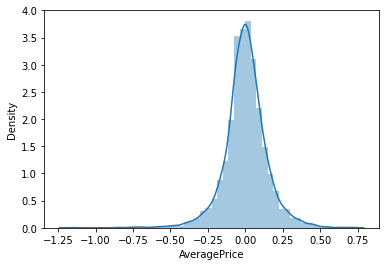

In [83]:
sns.distplot(RF_PRED-y_test)

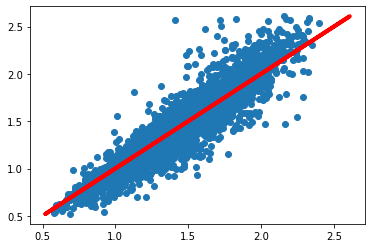

In [84]:
plt.scatter(RF_PRED,y_test)
plt.plot(y_test,y_test,linewidth=4,color='Red')

# Saving model

In [85]:
import pickle
filename='Avacado.pkl'
pickle.dump(RF,open(filename,'wb'))

# Conclusion:

In [86]:
loaded_model=pickle.load(open('Avacado.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

86.39915291467996


# Prediction with Region:

In [104]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [94]:
x_c=df.drop(columns=['region','Month'])
y_c=df['region']

In [95]:
x_c.shape

(17651, 12)

In [96]:
y_c.shape

(17651,)

# Standardize the data:

In [97]:
sc=StandardScaler()
sc.fit_transform(x_c)
x_c=pd.DataFrame(x_c,columns=x_c.columns)

In [98]:
#finding the best algorithm for dataset
model=[DecisionTreeClassifier(),KNeighborsClassifier()]
max_accuracy_score=0
for r_state in range(40,90):
    train_xc,test_xc,train_yc,test_yc=train_test_split(x_c,y_c,random_state=r_state,test_size=0.33)
    for i_c in model:
        i_c.fit(train_xc,train_yc)
        pre_c=i_c.predict(test_xc)
        ac_score=accuracy_score(test_yc,pre_c)
        print("accuracy score correspond to random state",r_state,"is", ac_score)
        if ac_score>max_accuracy_score:
            max_accuracy_score=ac_score
            final_state=r_state
            final_model=i_c
print()
print()
print()
print()


print("max accuracy score correspond to random state",final_state,"is",max_accuracy_score,"and model is ",final_model)

accuracy score correspond to random state 40 is 0.783519313304721
accuracy score correspond to random state 40 is 0.6338197424892704
accuracy score correspond to random state 41 is 0.7725321888412017
accuracy score correspond to random state 41 is 0.6348497854077253
accuracy score correspond to random state 42 is 0.7866094420600859
accuracy score correspond to random state 42 is 0.6355364806866953
accuracy score correspond to random state 43 is 0.775793991416309
accuracy score correspond to random state 43 is 0.6367381974248927
accuracy score correspond to random state 44 is 0.7833476394849785
accuracy score correspond to random state 44 is 0.6375965665236052
accuracy score correspond to random state 45 is 0.7821459227467811
accuracy score correspond to random state 45 is 0.646695278969957
accuracy score correspond to random state 46 is 0.7830042918454936
accuracy score correspond to random state 46 is 0.6465236051502146
accuracy score correspond to random state 47 is 0.781459227467811

In [99]:
#finding the best parameter for prediction of KNeighborsClassifier using GridSearchCV


train_xc,test_xc,train_yc,test_yc=train_test_split(x_c,y_c,random_state= 76,test_size=0.33)
KNC=KNeighborsClassifier()
parameters={"n_neighbors":range(1,30)}
gridsearch= GridSearchCV(KNC,parameters)
gridsearch.fit(train_xc,train_yc)
gridsearch.best_params_

{'n_neighbors': 1}

In [100]:
KNC=KNeighborsClassifier(n_neighbors=1)
KNC.fit(train_xc,train_yc)
predc = KNC.predict(test_xc)
acu_score=accuracy_score(test_yc,pre_c)
print("Accuracy score :",ac_score*100)

Accuracy score : 64.24034334763948


In [101]:
#calculating the score of dfferent parameter
score = cross_val_score(KNC,x_c,y_c,cv=100,scoring="accuracy").mean()
print("cross val score:", score*100)

cross val score: 64.42530174627632


In prediction:

Here the random state that is occurring is 79 which provide the best accuracy score for the model which is 64%. Also, by using the GridSeachCV I am able to find the best param and then find the best accuracy score that is 64.425%


# ROC Curve

In [102]:
pred_prob=KNC.predict_proba(test_xc)[:,1]
pred_prob

array([0., 0., 0., ..., 0., 0., 0.])

In [105]:
fpr,tpr,threashold=roc_curve(test_yc,pred_prob,pos_label=True)

In [106]:
print(fpr)
print("\n")
print(tpr)
print("\n")
print(threashold)

[0.         0.00524751 1.        ]


[0.         0.66666667 1.        ]


[2. 1. 0.]


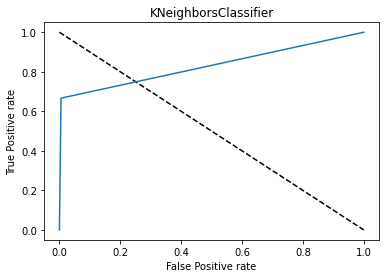

In [107]:
#plotting graph for ROC
plt.plot([0,1],[1,0],"k--")
plt.plot(fpr,tpr,label='KNeighborsClassifier')
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.title("KNeighborsClassifier")
plt.show()

Observation:

Taking price as y variable is predicting well for this model as compare to region Also, I used the Label Encoder to make the categorical data into numeric data i.e. Region and Sex Also, R2 score value is also greater then accuracy score Average price, total bags and total volume is well normally distributed data among all other column There are no outliers in the data set after replacing it through mean value As year is most negative co related column among all columns In between August to October the price of avocado is much higher as compared to other months Date 28,29 and 30 the price of avocado is high Hartford Springfield, San Francisco and New York are having more average price as compared to another region There is hike between month 8-10 of both type of avocado As organic type of avocado is having the more price per unit then conventional I had done prediction using region and price but using price the prediction score is high as compared to region So in this data set I am using both regression and classification technique for making this model
